In [33]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [34]:
plt.rcParams["figure.figsize"] = (6,6)

In [35]:
import numpy as np
import torch
from sklearn import datasets

# Simple gradients on tensors

In [36]:
a = torch.ones((3,2), requires_grad=True)
b = torch.ones((3,2), requires_grad=True)

In [37]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [38]:
b

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [39]:
c = (5 * a + 2 * b).sum()

In [40]:
c

tensor(42., grad_fn=<SumBackward0>)

In [41]:
a.grad #partial derivative of c over a

In [42]:
print(a.grad)

None


In [43]:
b.grad

The function is this:

$$
c = \sum_{ij} 5a_{ij}
$$

The gradient:

$$
    \frac{\partial c}{\partial a_{ij}} = \frac{\partial}{\partial a_{ij}}\sum_{km} 5a_{km} = 5 \sum_{km} \delta_{ik}\delta_{mj}  = 5
$$

In [44]:
print(c)

tensor(42., grad_fn=<SumBackward0>)


In [45]:
a.grad is None

True

In [46]:
c.backward()

In [47]:
a.grad

tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])

In [48]:
b.grad

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])

In [49]:
a.grad.zero_()
b.grad.zero_()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

# Logistic regression example

In [62]:
X, y = datasets.make_blobs(1000, centers=[[-3, -3], [0, 0]], cluster_std=1.25)

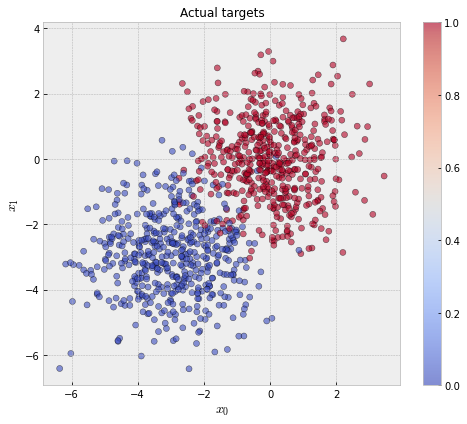

In [63]:
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [61]:
Xt = torch.tensor(X, dtype=torch.float)
yt = torch.tensor(np.expand_dims(y, axis=-1), dtype=torch.float)

Sigmoid activation function is defined as:
    
$$
\sigma (x) = \frac{1}{1+e^{-x}}
$$

Text(0.5, 1.0, 'Sigmoid function')

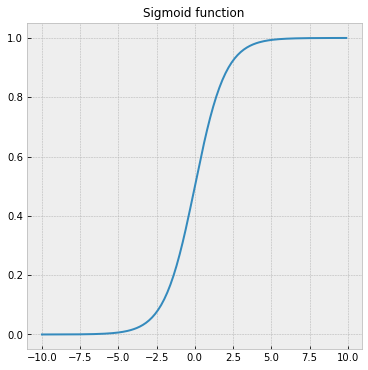

In [64]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, 1/(1+np.exp(-x)))
plt.title("Sigmoid function", fontsize=12)

In [54]:
def sigmoid(a):
    """Sigmoid activation function."""

    return 1/(1 + (-a).exp())

In [55]:
X

array([[-1.22166056, -0.27602098],
       [-1.34160976, -2.17151514],
       [-0.40317257,  1.86210266],
       ...,
       [-3.4624748 , -5.05926384],
       [-2.55186892, -1.7217621 ],
       [-3.90722772, -3.02681125]])

In [ ]:
y

In [20]:
W = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

In [57]:
W, b

(tensor([[ 1.1429],
         [-0.6741]], requires_grad=True),
 tensor([[1., 1.],
         [1., 1.],
         [1., 1.]], requires_grad=True))

## Meaning of $W$ and $b$

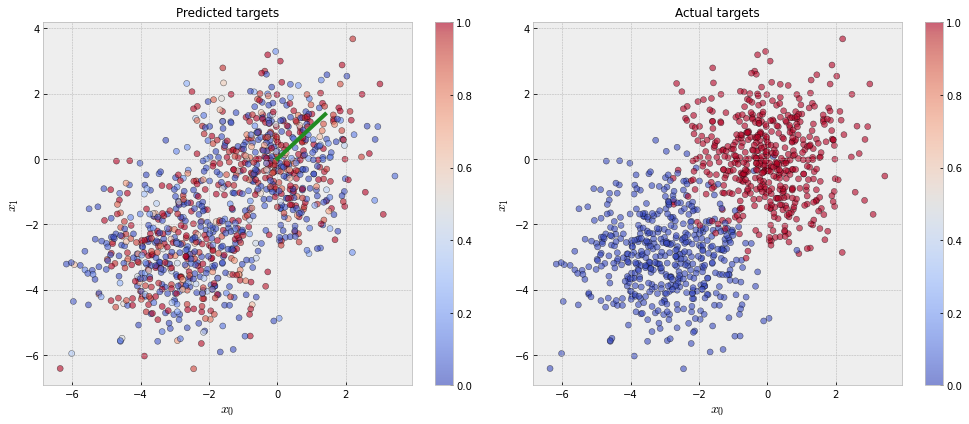

In [116]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [ ]:
W = torch.Tensor([[1], [1]])

In [ ]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [ ]:
b = torch.Tensor([[3]])

In [ ]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [ ]:
W = torch.Tensor([[0.5], [0.5]])
b = torch.Tensor([[1]])

In [ ]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [ ]:
W = torch.Tensor([[5], [5]])
b = torch.Tensor([[15]])

In [ ]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

## Log-loss

$$
L = - \frac{1}{N} \sum_k \left(y_k \log\left(\hat y_k\right) + \left(1 - y_k\right) \log\left(1 - \hat y_k\right)\right)
$$

$$
\hat y_i = \sigma(X_{ik}W_{k}+b)
$$

In [103]:
W = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

In [104]:
def output(x, w, b):
    return sigmoid(torch.mm(x, w) + b)

def logloss(y, y_pred):
    return -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()

In [107]:
y_pred = output(Xt, W, b)
loss = logloss(yt, y_pred)
loss.item(), (-loss).exp().item()

(0.10802334547042847, 0.8976066708564758)

Estimate probability:

$$
L = - \frac{1}{N} \sum_k (y_k \log(\hat y_k) + (1 - y_k) \log(1 - \hat y_k)) = -\langle\log P\rangle \approx -\log \langle P\rangle
$$

Hence:

$$
\langle P\rangle \approx e^{-L}
$$


In [118]:
Xt,X, W, b

(tensor([[-1.2217, -0.2760],
         [-1.3416, -2.1715],
         [-0.4032,  1.8621],
         ...,
         [-3.4625, -5.0593],
         [-2.5519, -1.7218],
         [-3.9072, -3.0268]]),
 array([[ 0.80567538,  0.53928051],
        [-0.67846166,  2.05079502],
        [-3.9599643 , -4.20885851],
        ...,
        [ 1.75892521,  1.2193563 ],
        [ 1.5374282 , -1.17619077],
        [-1.1540188 ,  0.3811417 ]]),
 tensor([[1.3999],
         [1.3638]], requires_grad=True),
 tensor([[3.9017]], requires_grad=True))

In [106]:
EPOCHS = 1000
LR = 1e-1
DELTA = 0.00001
loss_history = []

for i in range(EPOCHS):
    y_pred = output(Xt, W, b)
    loss = logloss(yt, y_pred)
    loss.backward()
    
    loss_history.append(loss.item())

    with torch.no_grad():
        W.sub_(LR * W.grad)
        b.sub_(LR * b.grad)
    W.grad.zero_()
    b.grad.zero_()

    if i % 20 == 0:
        print(f"Epoch {i}: loss = {loss_history[-1]}")
    
    try:
        if loss_history[-2] - loss_history[-1] < DELTA:
            break
    except:
        print('loss_history=',loss_history)
        pass

Epoch 0: loss = 1.1794644594192505
loss_history= [1.1794644594192505]
Epoch 20: loss = 0.47677081823349
Epoch 40: loss = 0.3640911281108856
Epoch 60: loss = 0.30043670535087585
Epoch 80: loss = 0.2615450918674469
Epoch 100: loss = 0.23570719361305237
Epoch 120: loss = 0.21715904772281647
Epoch 140: loss = 0.20305249094963074
Epoch 160: loss = 0.19187653064727783
Epoch 180: loss = 0.1827576756477356
Epoch 200: loss = 0.17515109479427338
Epoch 220: loss = 0.1686955988407135
Epoch 240: loss = 0.16314023733139038
Epoch 260: loss = 0.15830400586128235
Epoch 280: loss = 0.1540524810552597
Epoch 300: loss = 0.15028341114521027
Epoch 320: loss = 0.14691753685474396
Epoch 340: loss = 0.14389222860336304
Epoch 360: loss = 0.14115744829177856
Epoch 380: loss = 0.13867254555225372
Epoch 400: loss = 0.13640424609184265
Epoch 420: loss = 0.13432501256465912
Epoch 440: loss = 0.13241182267665863
Epoch 460: loss = 0.130645290017128
Epoch 480: loss = 0.12900900840759277
Epoch 500: loss = 0.127488821744

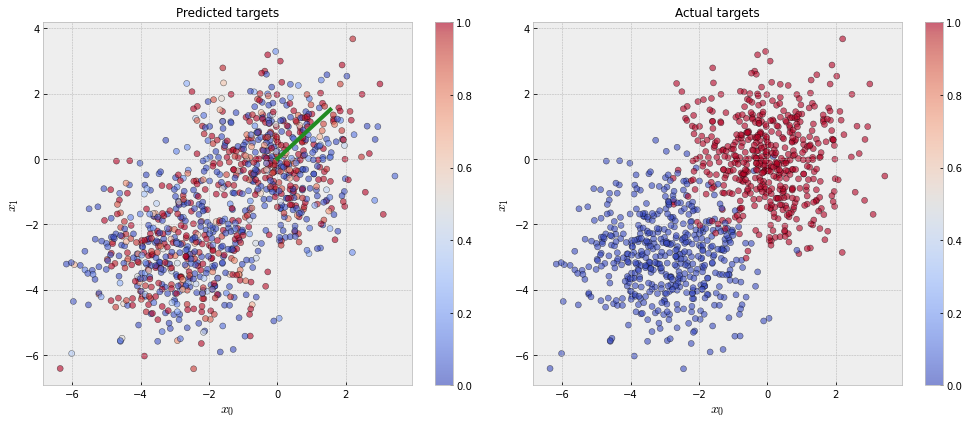

In [93]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [73]:
W, b

(tensor([[1.4096],
         [1.3731]], requires_grad=True),
 tensor([[3.9342]], requires_grad=True))

Text(0, 0.5, 'loss')

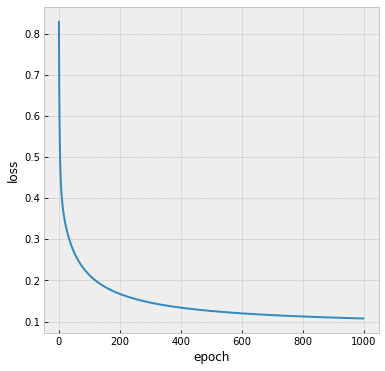

In [74]:
plt.figure(figsize=(6,6))
plt.plot(loss_history)
plt.xlabel("epoch")
plt.ylabel("loss")

In [75]:
y_ = y_pred.detach().numpy().flatten()

# Classification metrics

In [76]:
from sklearn.metrics import classification_report

In [77]:
y_class = (y_ >= 0.5).astype(int)

In [78]:
print(classification_report(y, y_class))

              precision    recall  f1-score   support

           0       0.53      0.54      0.53       500
           1       0.53      0.52      0.52       500

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000



(array([191.,  27.,  12.,   4.,   7.,   7.,  14.,  13.,  22., 203.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

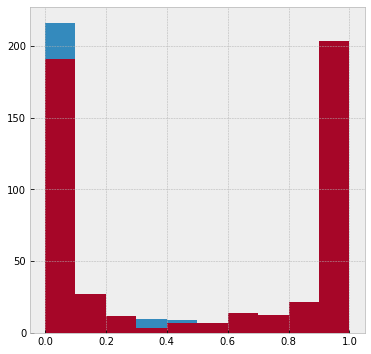

In [79]:
plt.hist(y_[y==0], range=(0,1))
plt.hist(y_[y==1], range=(0,1))

In [80]:
(y==0).mean()

0.5